In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score
import pickle  # To save models
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Read Database
df = pd.read_csv("C:/Users/asus/Downloads/RFLFSODataFull.csv")
# Display dataset info
print("Dataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance               91379 non-null  float64
 6   Frequency              91379 non-null  int64  
 7   Particulate            91379 non-null  float64
 8   ParticulateMax         91379 non-null  float64
 9   ParticulateMin         91379 non-null  float64
 10  RainIntensity          91379 non-null  float64
 11  RainIntensityMax       91379 non-null  float64
 12  RainIntensityMin       91379 non-null  float64
 13  RelativeHumidity       91379 non-null  float64
 14  SYNOPCode              91379 non-null  i

In [3]:
# Descriptive statistics
print("\nDataset Description:")
print(df.describe())



Dataset Description:
            FSO_Att       RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
count  91379.000000  91379.000000      91379.000000         91379.000000   
mean       6.769458     11.619098          9.553919            10.032760   
std        3.903843      3.438873          5.858577             6.162798   
min        0.788363      0.027142          1.141556             1.238270   
25%        3.473063     10.829331          4.958993             5.205861   
50%        6.336167     11.856560          6.870737             7.205499   
75%        8.664984     12.847944         14.049470            14.782679   
max       32.455222     46.893150         24.790883            26.407305   

       AbsoluteHumidityMin      Distance     Frequency   Particulate  \
count         91379.000000  91379.000000  9.137900e+04  91379.000000   
mean              9.076251   3297.930328  7.850005e+10     27.065979   
std               5.575927   1224.305893  5.000027e+09     72.134023   
min  

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64


In [5]:
df.tail(5)

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
91374,9.150012,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,...,27.257926,26.013205,4,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000
91375,9.333777,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,...,28.101044,25.032282,4,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834
91376,8.873168,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,...,28.249678,26.205773,4,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824
91377,9.538886,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,...,26.880084,25.031934,5,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146
91378,11.290048,11.611650,20.876100,22.581643,19.785652,3969.829548,83500000000,53.697748,58.066729,49.739824,...,25.628530,22.694495,5,7321.574274,7546.606219,7045.985361,93.243162,0.000000,0.476268,0.000000


In [6]:
# Convert SYNOPCode to a categorical variable
df['SYNOPCode'] = df['SYNOPCode'].astype('category')

print("SYNOP_Code Data Type:", df['SYNOPCode'].dtype)
print("Unique SYNOP Codes:", df['SYNOPCode'].unique())

SYNOP_Code Data Type: category
Unique SYNOP Codes: [0, 6, 8, 5, 3, 4, 7]
Categories (7, int64): [0, 3, 4, 5, 6, 7, 8]


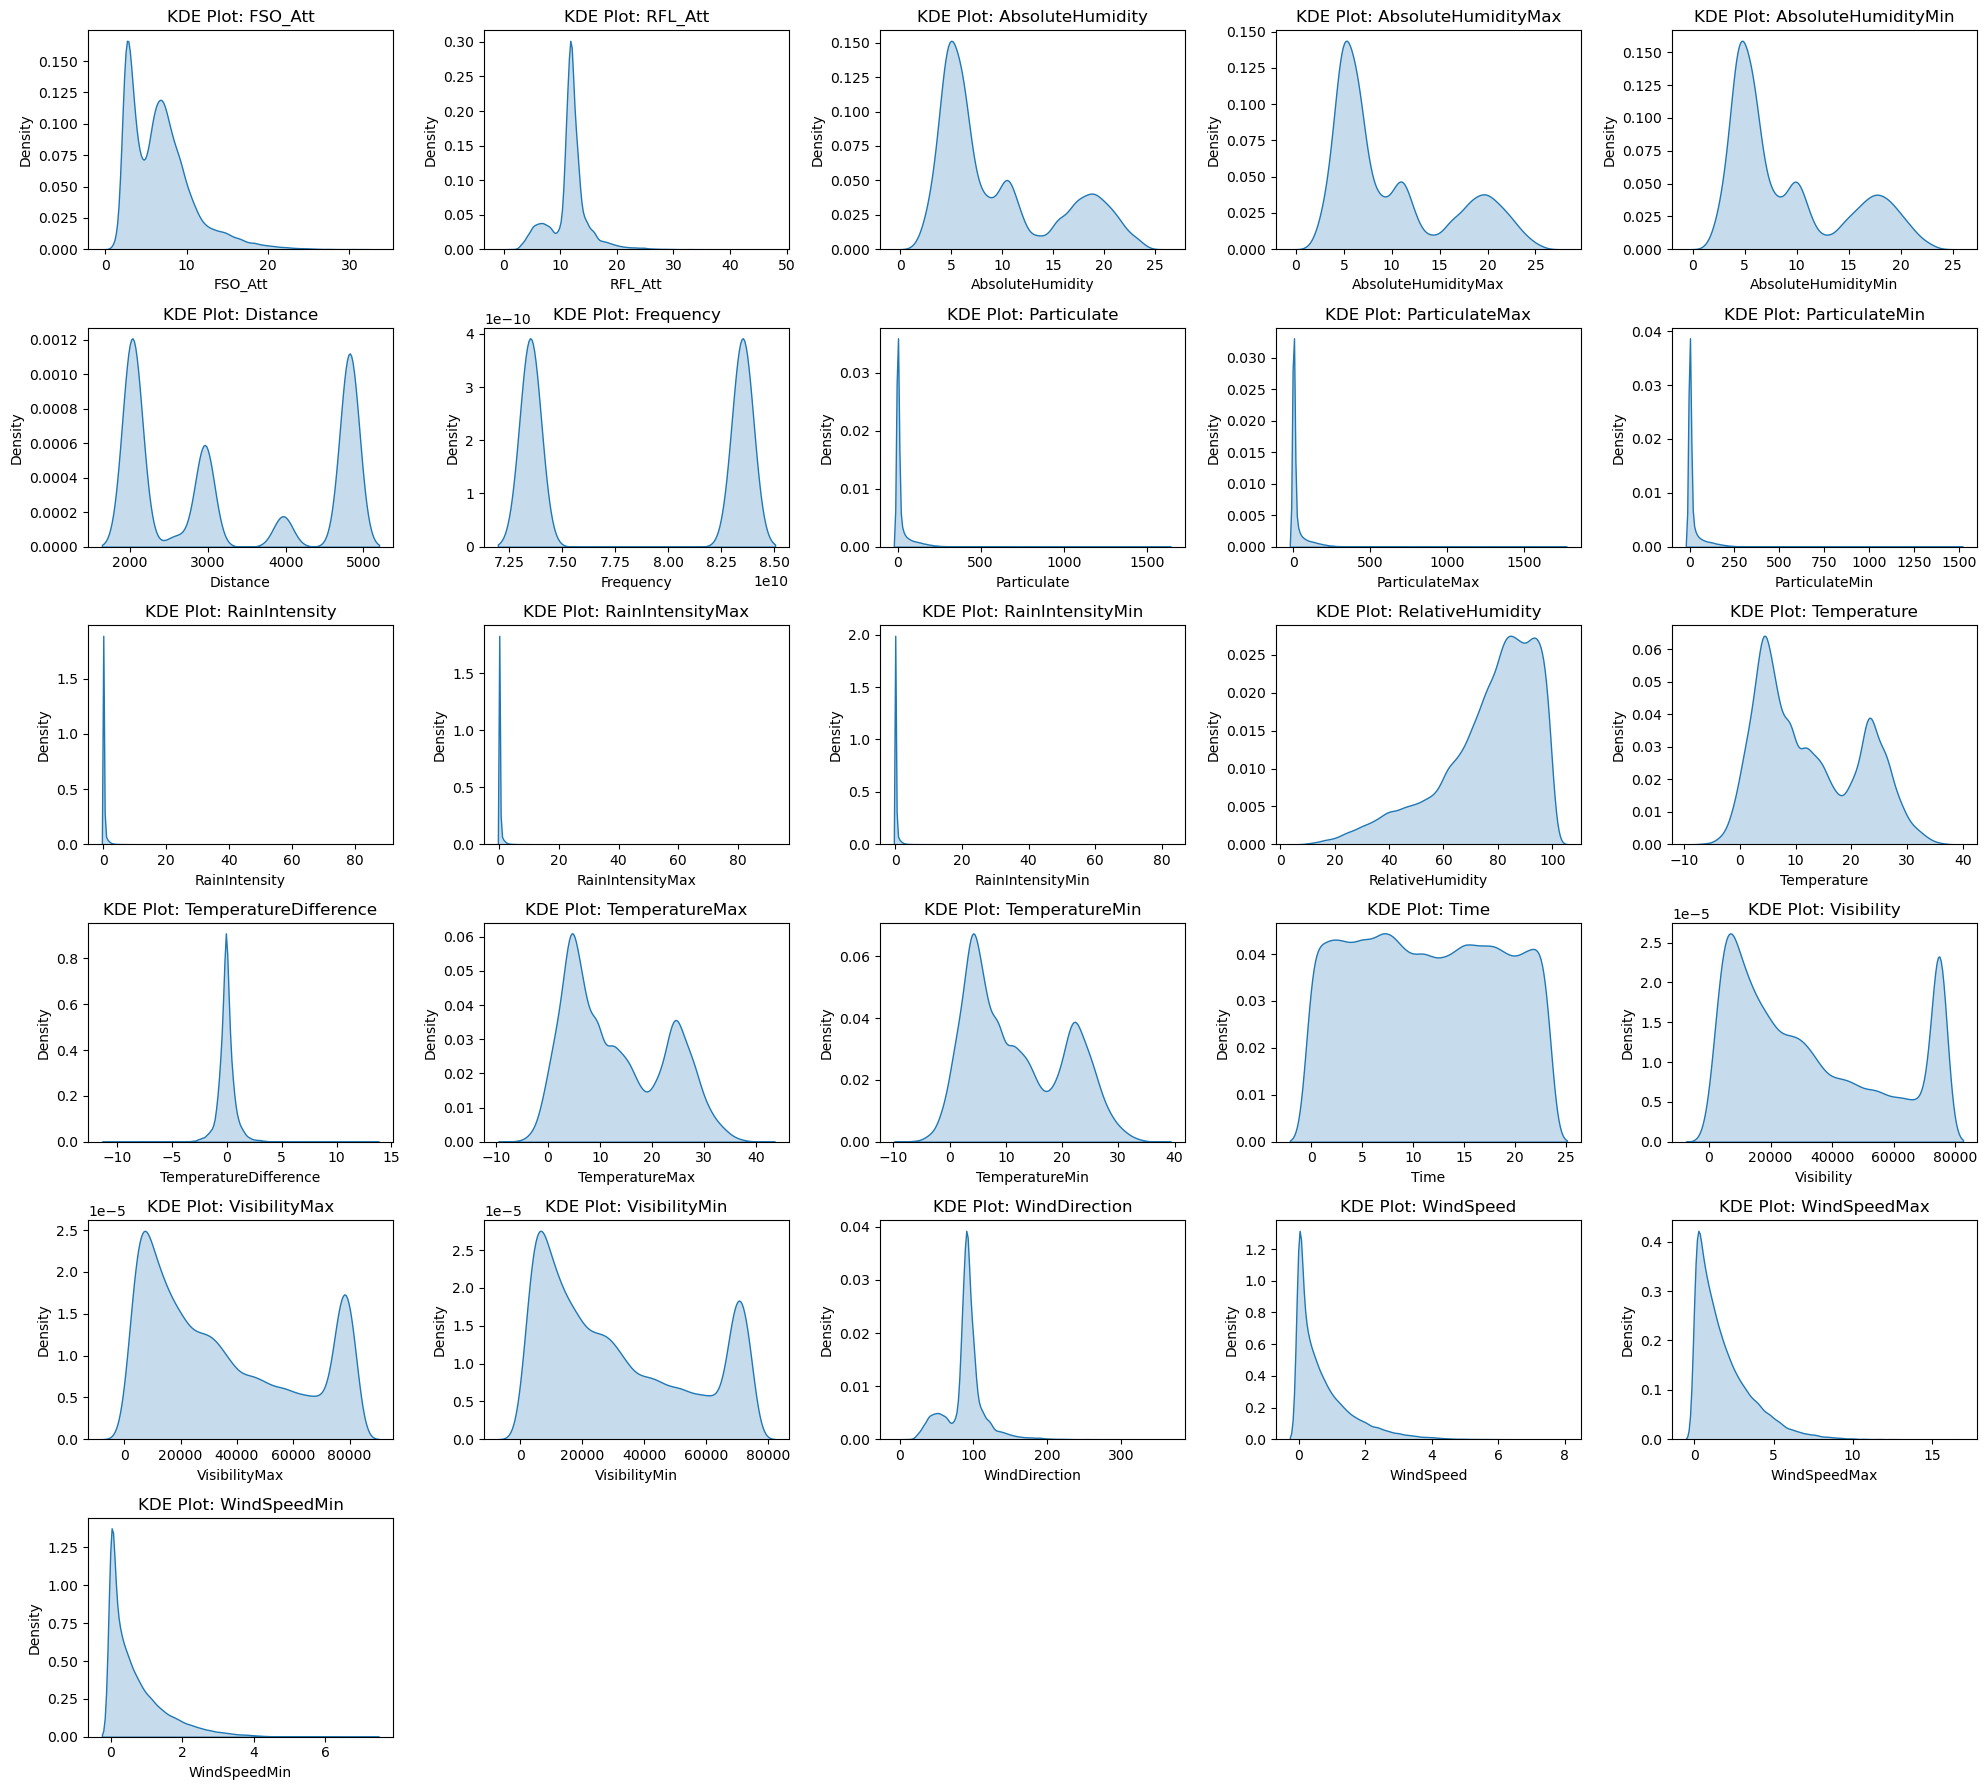

In [7]:
# KDE plots for all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
n_cols = 5  # Number of columns per row
n_rows = -(-len(numeric_cols) // n_cols)  # Calculate rows dynamically

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Adjust figure size
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(df[col], fill=True)  # Updated from shade=True
    plt.title(f"KDE Plot: {col}")
plt.tight_layout()
plt.show()

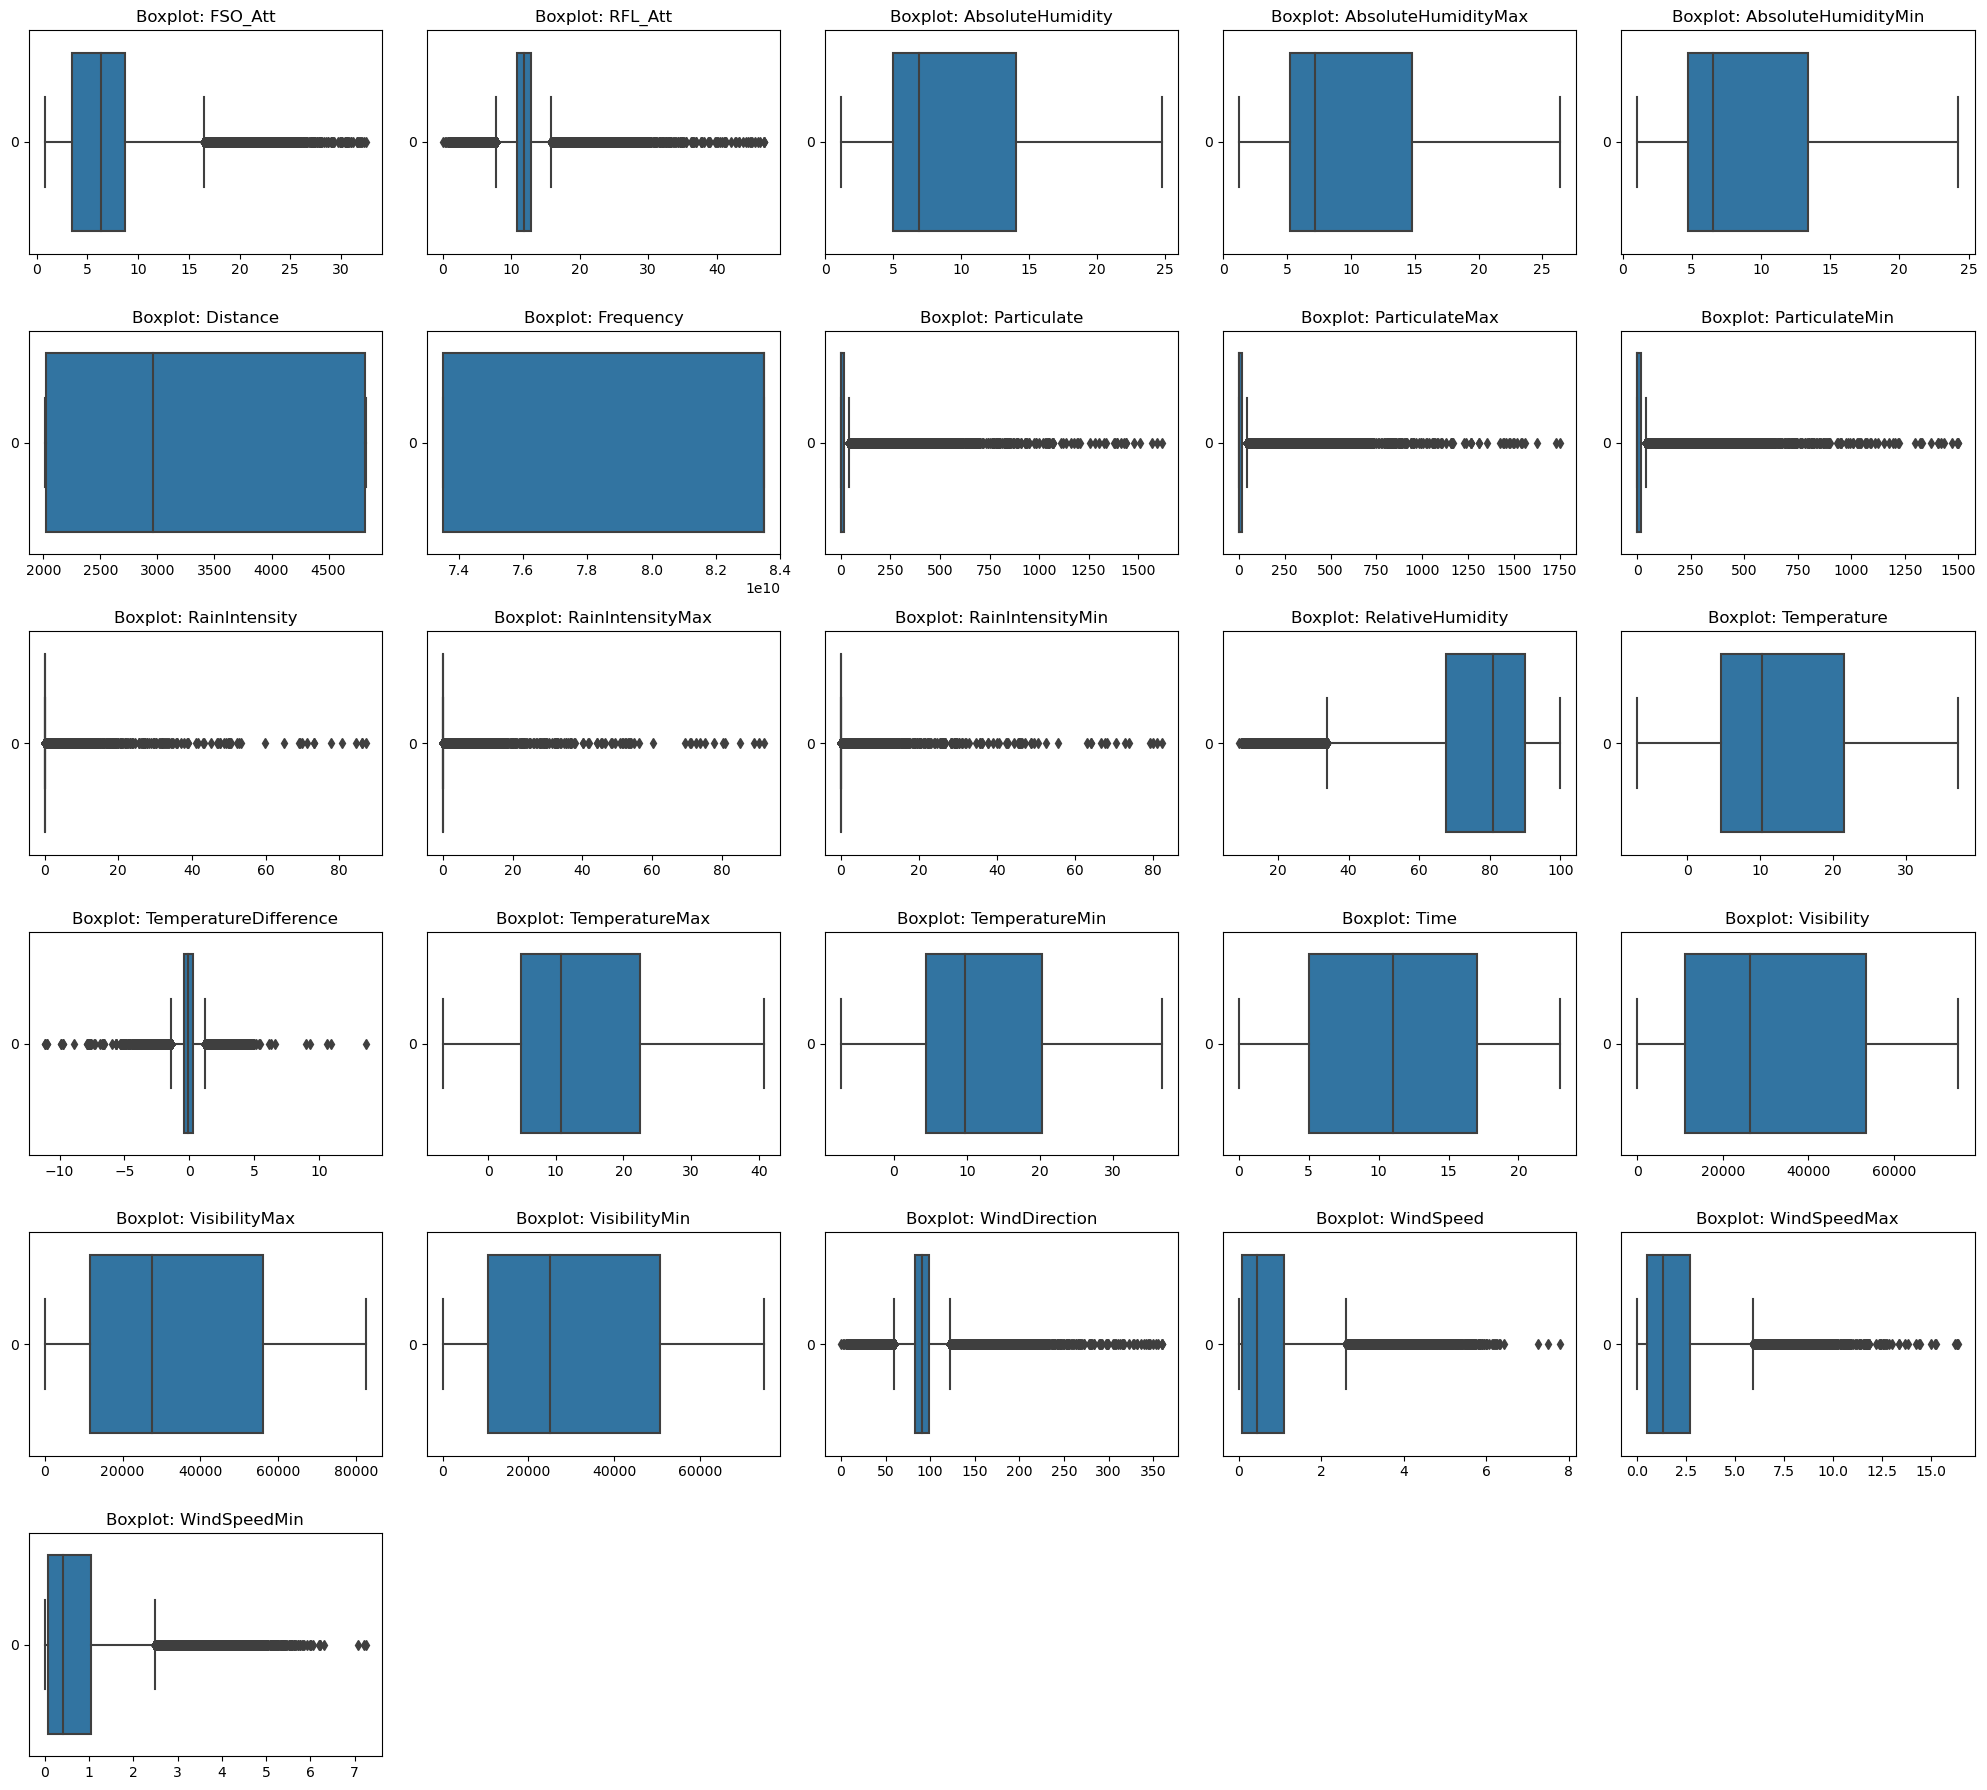

In [8]:
# Boxplots for all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
n_cols = 5  # Number of columns per row
n_rows = -(-len(numeric_cols) // n_cols)  # Dynamically calculate rows

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Adjust figure size dynamically
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df[col], orient="h")  # Horizontal boxplot for better visibility
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_18220\2211616278.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


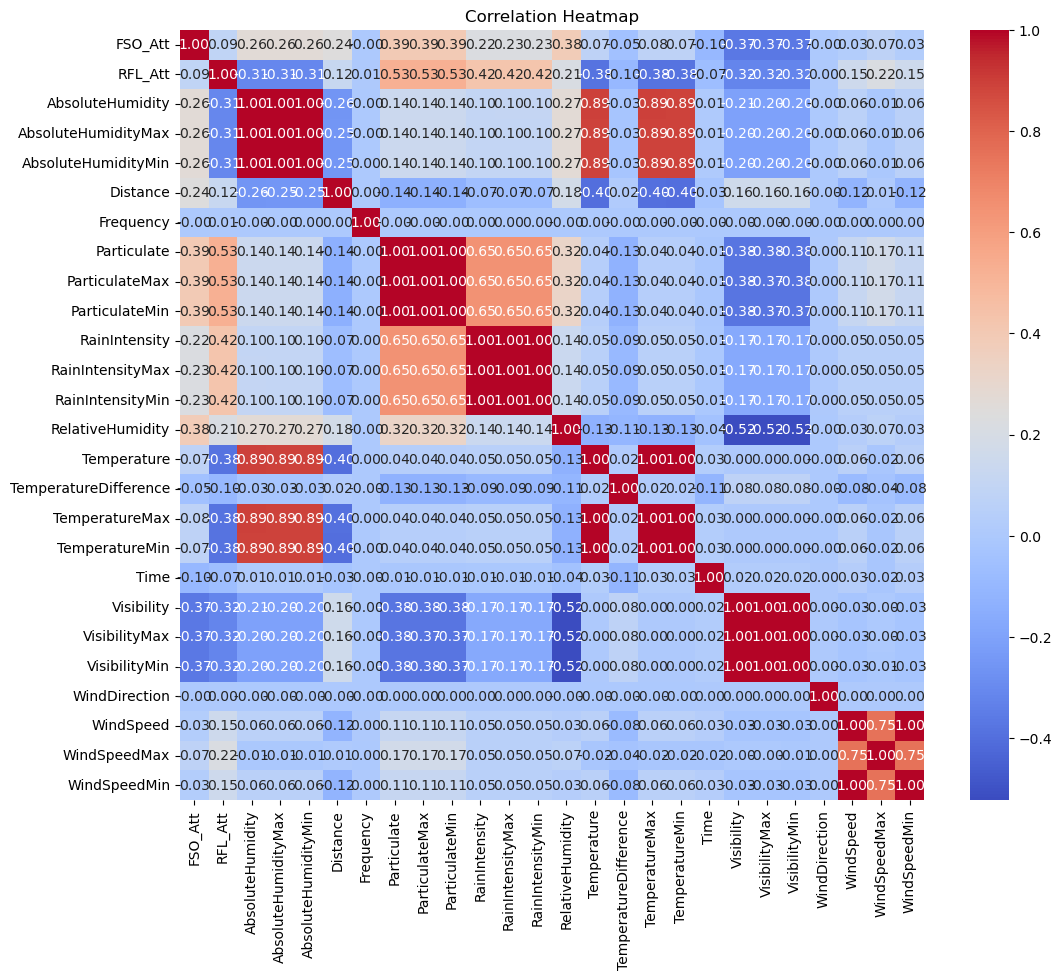

In [9]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# creating generic model for RFL_Att
X = df.drop(['FSO_Att', 'RFL_Att'], axis=1)
y_rfl = df[[ 'RFL_Att']]
X_train_rfl, X_test_rfl , y_train_rfl , y_test_rfl = train_test_split(X, y_rfl , test_size = 0.3, random_state = 42)
y_train = y_train_rfl.values.ravel()
y_test = y_test_rfl.values.ravel()
model_rfl = RandomForestRegressor(oob_score=True, random_state=42)
model_rfl.fit(X_train_rfl, y_train_rfl)
y_pred_rfl = model_rfl.predict(X_test_rfl)
rmse_rfl = np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl))
r2_rfl = r2_score(y_test_rfl, y_pred_rfl)



rfl_model_results = {
    "OOB_Score": model_rfl.oob_score_,
    "RMSE": rmse_rfl,
    "R2": r2_rfl
}

# Output the stored results
print("RFL_Att Model Results:")
print(rfl_model_results)

RFL_Att Model Results:
{'OOB_Score': 0.974840923125828, 'RMSE': 0.5213114856638957, 'R2': 0.9768397841565511}


In [11]:
# Creating Generic model for FSO_Att
X = df.drop(['FSO_Att', 'RFL_Att'], axis=1)  
y_fso = df['FSO_Att']  
X_train, X_test, y_train_fso, y_test_fso = train_test_split(X, y_fso, test_size=0.3, random_state=42)
model_fso = RandomForestRegressor(oob_score=True, random_state=42)
model_fso.fit(X_train, y_train_fso)

# Predictions for the test set
y_pred_fso = model_fso.predict(X_test)
rmse_fso = np.sqrt(mean_squared_error(y_test_fso, y_pred_fso))
r2_fso = r2_score(y_test_fso, y_pred_fso)


fso_model_results = {
    "OOB_Score": model_fso.oob_score_,
    "RMSE": rmse_fso,
    "R2": r2_fso
}

# Output the stored results
print("FSO_Att Model Results:")
print(fso_model_results)

FSO_Att Model Results:
{'OOB_Score': 0.9527257769160224, 'RMSE': 0.8131748488564747, 'R2': 0.9558168723648836}


In [12]:
# Downsample the DATASET for saving for computer resource

# Display the initial distribution
synop_distribution = df['SYNOPCode'].value_counts()
print("Initial SYNOPCode Distribution:\n", synop_distribution)

# downsampling to Total 9000 number of records 
num_synop_codes = len(synop_distribution)
target_per_code = 9000 // num_synop_codes
print("\nTarget Records Per SYNOPCode:", target_per_code)

# Create a balanced dataset
balanced_data = pd.DataFrame()

for synop_code, count in synop_distribution.items():
    subset = df[df['SYNOPCode'] == synop_code]
    
    if count >= target_per_code:
        # Downsample majority classes
        subset_balanced = subset.sample(target_per_code, random_state=42)
    else:
        # Bootstrap minority classes
        subset_balanced = subset.sample(target_per_code, replace=True, random_state=42)
    
    balanced_data = pd.concat([balanced_data, subset_balanced], ignore_index=True)

# Verify the new distribution
balanced_distribution = balanced_data['SYNOPCode'].value_counts()
print("\nBalanced SYNOPCode Distribution:\n", balanced_distribution)

# Save the balanced dataset
balanced_data.to_csv('Balanced_Dataset.csv', index=False)
print("\nBalanced dataset saved as 'Balanced_Dataset.csv'.")


Initial SYNOPCode Distribution:
 0    56964
6    25018
5     6605
8     1716
4      466
7      419
3      191
Name: SYNOPCode, dtype: int64

Target Records Per SYNOPCode: 1285

Balanced SYNOPCode Distribution:
 0    1285
3    1285
4    1285
5    1285
6    1285
7    1285
8    1285
Name: SYNOPCode, dtype: int64

Balanced dataset saved as 'Balanced_Dataset.csv'.


In [13]:
balanced_data.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,6.857219,5.069489,14.682099,15.717176,14.664532,2961.886251,73500000000,0.0,0.0,0.0,...,19.979123,17.557490,21,45857.443250,48768.845558,44225.348173,52.521247,0.471960,1.025758,0.457783
1,11.686944,12.659372,7.858811,8.390548,7.757759,2585.229227,83500000000,0.0,0.0,0.0,...,19.562956,17.639011,12,36284.477600,37503.198582,35626.175016,92.816494,3.384595,6.388252,3.279724
2,9.375230,3.734785,9.057397,9.253028,9.012814,2958.820370,83500000000,0.0,0.0,0.0,...,18.524791,15.877571,13,64350.111100,64384.177940,59348.996852,83.405317,0.000000,0.090859,0.000000
3,4.864496,11.203769,3.647547,3.821812,3.572852,4820.483790,73500000000,0.0,0.0,0.0,...,6.267305,5.436820,12,74995.192040,78609.932555,73574.396183,103.716825,0.147505,0.301495,0.144998
4,4.064052,12.818626,7.059999,7.533748,6.551670,4826.974011,83500000000,0.0,0.0,0.0,...,6.711993,5.813281,2,5322.886654,5664.386291,5189.554847,34.894296,0.000000,0.039788,0.000000


In [14]:
#Feature selection using backward propgation


# Function to perform backward propagation with OOB scoring
def backward_feature_elimination(X, y, target_name):
    rf = RandomForestRegressor(oob_score=True, random_state=42)
    features = list(X.columns)
    best_oob_score = 0
    selected_features = features.copy()

    # DataFrame to save OOB scores and features at each step
    oob_scores_df = pd.DataFrame(columns=["Num_Features", "OOB_Score", "Dropped_Feature"])

    while len(features) > 1:
        # Train Random Forest with current feature set
        rf.fit(X[features], y)
        current_oob_score = rf.oob_score_

        # Identify the least important feature
        importances = rf.feature_importances_
        least_important_feature = features[importances.argmin()]

        # Save the OOB score and features
       

        new_row = pd.DataFrame([{
        "Num_Features": len(features),
        "OOB_Score": current_oob_score,
        "Dropped_Feature": least_important_feature
        }])

        oob_scores_df = pd.concat([oob_scores_df, new_row], ignore_index=True)
        # Update best OOB score and selected features if improved
        if current_oob_score > best_oob_score:
            best_oob_score = current_oob_score
            selected_features = features.copy()

        # Remove the least important feature
        features.remove(least_important_feature)

    # Save the selected features
    selected_features_df = pd.DataFrame({"Selected_Features": selected_features})

    # Save results
    oob_scores_df.to_csv(f"oob_scores_{target_name}.csv", index=False)
    selected_features_df.to_csv(f"selected_features_{target_name}.csv", index=False)

    print(f"Best OOB Score: {best_oob_score}")
    print(f"Selected Features for {target_name}: {selected_features}")
    return selected_features

# Apply backward propagation for RF Attenuation (RFL_Att)
X_rf = balanced_data.drop(columns=['RFL_Att', 'FSO_Att', 'SYNOPCode'])
y_rf = balanced_data['RFL_Att']
selected_features_rf = backward_feature_elimination(X_rf, y_rf, "RFL_Att")

# Apply backward propagation for FSO Attenuation (FSO_Att)
X_fso = balanced_data.drop(columns=['RFL_Att', 'FSO_Att', 'SYNOPCode'])
y_fso = balanced_data['FSO_Att']
selected_features_fso = backward_feature_elimination(X_fso, y_fso, "FSO_Att")


Best OOB Score: 0.9350893213686657
Selected Features for RFL_Att: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'Visibility', 'VisibilityMax', 'VisibilityMin']
Best OOB Score: 0.971826301681913
Selected Features for FSO_Att: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeedMax']


In [15]:
# Save selected features for RFL_Att
data_rfl_selected = df[['RFL_Att','SYNOPCode'] + selected_features_rf]
data_rfl_selected.to_csv('RFL_Selected_Features.csv', index=False)

# Save selected features for FSO_Att
data_fso_selected = df[['FSO_Att','SYNOPCode'] + selected_features_fso]
data_fso_selected.to_csv('FSO_Selected_Features.csv', index=False)

print("Selected features for RFL_Att and FSO_Att saved to CSV files.")

Selected features for RFL_Att and FSO_Att saved to CSV files.


In [16]:
# Separate features and target for RFL_Att
X_rfl = data_rfl_selected.drop(columns=['RFL_Att','SYNOPCode'])
y_rfl = data_rfl_selected['RFL_Att']

# Train-test split for RFL_Att
X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X_rfl, y_rfl, test_size=0.3, random_state=42)

# Train Random Forest for RFL_Att
rf_rfl = RandomForestRegressor(oob_score=True, random_state=42)
rf_rfl.fit(X_train_rfl, y_train_rfl)
print("RFL_Att Model OOB Score:", rf_rfl.oob_score_)

# Repeat for FSO_Att
X_fso = data_fso_selected.drop(columns=['FSO_Att','SYNOPCode'])
y_fso = data_fso_selected['FSO_Att']

X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X_fso, y_fso, test_size=0.3, random_state=42)

rf_fso = RandomForestRegressor(oob_score=True, random_state=42)
rf_fso.fit(X_train_fso, y_train_fso)
print("FSO_Att Model OOB Score:", rf_fso.oob_score_)


RFL_Att Model OOB Score: 0.9736004971704231
FSO_Att Model OOB Score: 0.9548352447133326


In [17]:



# RFL_Att Model
# Separate features and target
X_rfl = data_rfl_selected.drop(columns=['RFL_Att', 'SYNOPCode'])
y_rfl = data_rfl_selected['RFL_Att']

# Train-test split
X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X_rfl, y_rfl, test_size=0.3, random_state=42)

# Train Random Forest for RFL_Att
rf_rfl = RandomForestRegressor(oob_score=True, random_state=42)
rf_rfl.fit(X_train_rfl, y_train_rfl)

# Predictions and metrics for RFL_Att
y_pred_rfl = rf_rfl.predict(X_test_rfl)
rmse_rfl = np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl))
r2_rfl = r2_score(y_test_rfl, y_pred_rfl)

print("RFL_Att Model OOB Score:", rf_rfl.oob_score_)
print("RFL_Att Model RMSE:", rmse_rfl)
print("RFL_Att Model R²:", r2_rfl)

# FSO_Att Model
# Separate features and target
X_fso = data_fso_selected.drop(columns=['FSO_Att', 'SYNOPCode'])
y_fso = data_fso_selected['FSO_Att']

# Train-test split
X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X_fso, y_fso, test_size=0.3, random_state=42)

# Train Random Forest for FSO_Att
rf_fso = RandomForestRegressor(oob_score=True, random_state=42)
rf_fso.fit(X_train_fso, y_train_fso)

# Predictions and metrics for FSO_Att
y_pred_fso = rf_fso.predict(X_test_fso)
rmse_fso = np.sqrt(mean_squared_error(y_test_fso, y_pred_fso))
r2_fso = r2_score(y_test_fso, y_pred_fso)

print("FSO_Att Model OOB Score:", rf_fso.oob_score_)
print("FSO_Att Model RMSE:", rmse_fso)
print("FSO_Att Model R²:", r2_fso)


RFL_Att Model OOB Score: 0.9736004971704231
RFL_Att Model RMSE: 0.5479202502753792
RFL_Att Model R²: 0.9744151592183754
FSO_Att Model OOB Score: 0.9548352447133326
FSO_Att Model RMSE: 0.7999226798028903
FSO_Att Model R²: 0.9572452274110571


In [18]:

# Load processed data
data_rfl_selected = pd.read_csv('RFL_Selected_Features.csv')
data_fso_selected = pd.read_csv('FSO_Selected_Features.csv')

# List to store results
results_rfl = []
results_fso = []

# Get unique SYNOP codes
synop_codes = data_rfl_selected['SYNOPCode'].unique()

# Function to train and evaluate Random Forest models
def train_random_forest(X, y, synop_code, target_name):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train Random Forest model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = rf_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Save the trained model
    model_filename = f'RF_Model_{target_name}_SYNOP_{synop_code}.pkl'
    with open(model_filename, 'wb') as f:
        pickle.dump(rf_model, f)
    
    return rmse, r2, model_filename

# Train Specific Random Forests for RFL_Att
for synop_code in synop_codes:
    subset = data_rfl_selected[data_rfl_selected['SYNOPCode'] == synop_code]
    X = subset.drop(columns=['RFL_Att', 'SYNOPCode'])
    y = subset['RFL_Att']
    
    rmse, r2, model_file = train_random_forest(X, y, synop_code, 'RFL_Att')
    results_rfl.append({'SYNOPCode': synop_code, 'RMSE': rmse, 'R2': r2, 'Model_File': model_file})

# Train Specific Random Forests for FSO_Att
for synop_code in synop_codes:
    subset = data_fso_selected[data_fso_selected['SYNOPCode'] == synop_code]
    X = subset.drop(columns=['FSO_Att', 'SYNOPCode'])
    y = subset['FSO_Att']
    
    rmse, r2, model_file = train_random_forest(X, y, synop_code, 'FSO_Att')
    results_fso.append({'SYNOPCode': synop_code, 'RMSE': rmse, 'R2': r2, 'Model_File': model_file})

# Convert results to DataFrame for easy review
results_rfl_df = pd.DataFrame(results_rfl)
results_fso_df = pd.DataFrame(results_fso)

# Save results to CSV
results_rfl_df.to_csv('RFL_Att_Model_Results.csv', index=False)
results_fso_df.to_csv('FSO_Att_Model_Results.csv', index=False)

print("Training complete. Results saved to 'RFL_Att_Model_Results.csv' and 'FSO_Att_Model_Results.csv'.")


Training complete. Results saved to 'RFL_Att_Model_Results.csv' and 'FSO_Att_Model_Results.csv'.


In [19]:
print(results_rfl_df)

   SYNOPCode      RMSE        R2                    Model_File
0          0  0.458464  0.968156  RF_Model_RFL_Att_SYNOP_0.pkl
1          6  0.763252  0.963090  RF_Model_RFL_Att_SYNOP_6.pkl
2          8  0.967905  0.890349  RF_Model_RFL_Att_SYNOP_8.pkl
3          5  0.710096  0.941798  RF_Model_RFL_Att_SYNOP_5.pkl
4          3  0.397270  0.983563  RF_Model_RFL_Att_SYNOP_3.pkl
5          4  0.491188  0.923793  RF_Model_RFL_Att_SYNOP_4.pkl
6          7  0.321835  0.944646  RF_Model_RFL_Att_SYNOP_7.pkl


In [20]:
print(results_fso_df)

   SYNOPCode      RMSE        R2                    Model_File
0          0  0.819308  0.946422  RF_Model_FSO_Att_SYNOP_0.pkl
1          6  0.833165  0.961908  RF_Model_FSO_Att_SYNOP_6.pkl
2          8  0.985070  0.930314  RF_Model_FSO_Att_SYNOP_8.pkl
3          5  0.961559  0.929446  RF_Model_FSO_Att_SYNOP_5.pkl
4          3  1.911748  0.954967  RF_Model_FSO_Att_SYNOP_3.pkl
5          4  0.594532  0.976028  RF_Model_FSO_Att_SYNOP_4.pkl
6          7  0.897278  0.971220  RF_Model_FSO_Att_SYNOP_7.pkl


Comparison of RFL_Att Models:
Generic Model - RMSE: 0.5213, R2: 0.9768
Specific Models - Avg RMSE: 0.5871, Avg R2: 0.9451

Comparison of FSO_Att Models:
Generic Model - RMSE: 0.8132, R2: 0.9558
Specific Models - Avg RMSE: 1.0004, Avg R2: 0.9529


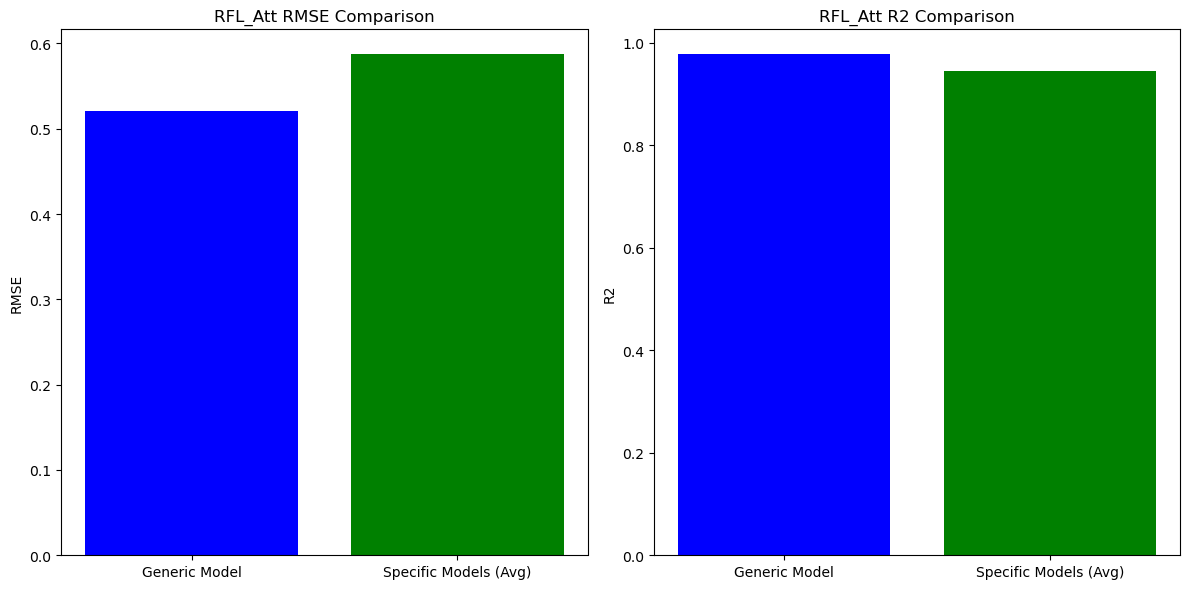

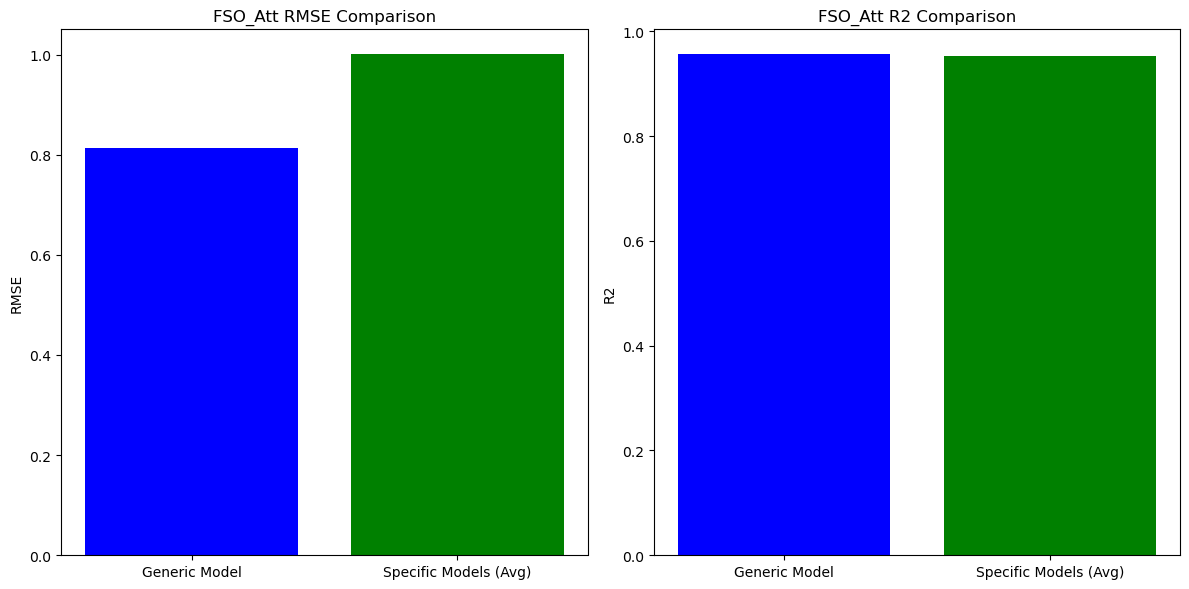

In [21]:
import numpy as np
import matplotlib.pyplot as plt



# Specific Model Results 
specific_rfl_metrics = {
    'Average_RMSE': results_rfl_df['RMSE'].mean(),
    'Average_R2': results_rfl_df['R2'].mean(),
    'Best_RMSE': results_rfl_df['RMSE'].min(),
    'Best_R2': results_rfl_df['R2'].max(),
    'Worst_RMSE': results_rfl_df['RMSE'].max(),
    'Worst_R2': results_rfl_df['R2'].min()
}

specific_fso_metrics = {
    'Average_RMSE': results_fso_df['RMSE'].mean(),
    'Average_R2': results_fso_df['R2'].mean(),
    'Best_RMSE': results_fso_df['RMSE'].min(),
    'Best_R2': results_fso_df['R2'].max(),
    'Worst_RMSE': results_fso_df['RMSE'].max(),
    'Worst_R2': results_fso_df['R2'].min()
}

# Print comparison summary
print("Comparison of RFL_Att Models:")
print("Generic Model - RMSE: {:.4f}, R2: {:.4f}".format(rfl_model_results['RMSE'], rfl_model_results['R2']))
print("Specific Models - Avg RMSE: {:.4f}, Avg R2: {:.4f}".format(specific_rfl_metrics['Average_RMSE'], specific_rfl_metrics['Average_R2']))

print("\nComparison of FSO_Att Models:")
print("Generic Model - RMSE: {:.4f}, R2: {:.4f}".format(fso_model_results['RMSE'], fso_model_results['R2']))
print("Specific Models - Avg RMSE: {:.4f}, Avg R2: {:.4f}".format(specific_fso_metrics['Average_RMSE'], specific_fso_metrics['Average_R2']))

# Visualization
labels = ['Generic Model', 'Specific Models (Avg)']

# RFL_Att Comparison
rfl_rmse = [rfl_model_results['RMSE'], specific_rfl_metrics['Average_RMSE']]
rfl_r2 = [rfl_model_results['R2'], specific_rfl_metrics['Average_R2']]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(labels, rfl_rmse, color=['blue', 'green'])
plt.title("RFL_Att RMSE Comparison")
plt.ylabel("RMSE")

plt.subplot(1, 2, 2)
plt.bar(labels, rfl_r2, color=['blue', 'green'])
plt.title("RFL_Att R2 Comparison")
plt.ylabel("R2")

plt.tight_layout()
plt.show()

# FSO_Att Comparison
fso_rmse = [fso_model_results['RMSE'], specific_fso_metrics['Average_RMSE']]
fso_r2 = [fso_model_results['R2'], specific_fso_metrics['Average_R2']]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(labels, fso_rmse, color=['blue', 'green'])
plt.title("FSO_Att RMSE Comparison")
plt.ylabel("RMSE")

plt.subplot(1, 2, 2)
plt.bar(labels, fso_r2, color=['blue', 'green'])
plt.title("FSO_Att R2 Comparison")
plt.ylabel("R2")

plt.tight_layout()
plt.show()

